In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1

### Task 1.1

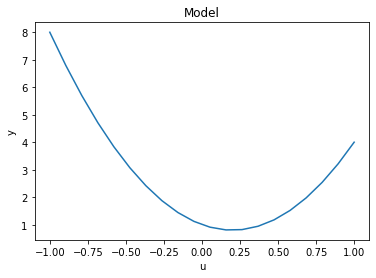

In [3]:
def arbitrary_poly(params):
    poly_model = lambda x: sum([p*(x**i) for i, p in enumerate(params)])
    return poly_model

# params: [theta_0, theta_1, ... , theta_n], where n = model order and theta_0 is bias 
true_params = [1,-2,5]
y_model = arbitrary_poly(true_params)

u = np.linspace(start=-1, stop=1, num=20)
plt.figure()
plt.plot(u, y_model(u))
plt.xlabel("u")
plt.ylabel("y")
plt.title("Model");

### Task 1.2

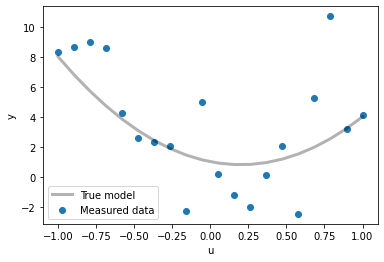

In [26]:
# Hyperparameters for the type of noise-generating distribution.
alpha = 0         # probability in mixture model
mean = 0          # mean parameter 
sigma = 1         # std dev parameter Gaussian
beta = 2.5          # scaling parameter Laplacian
N = 20            # number of samples

# The Laplace probability density function:
# Also available in library "scipy.stats.laplace"
def laplace_pdf(x, loc, scale):
    return (1.0/(2.0 * scale)) * np.exp( -np.abs(x-loc) / scale)

# The Gaussian probability density function:
# Also available in library "scipy.stats.norm"
def gauss_pdf(x, loc, scale):
    return 1.0/(scale * np.sqrt(2.0 * np.pi)) * np.exp( -0.5 * ((x - loc) / scale)**2 )

# Generate data points
y_true = y_model(u)

# Generate noise
from scipy.stats import norm, laplace
noise = np.zeros(N)
for i in range(N):
    if np.random.uniform(0, 1) <= alpha:
        # Gaussian when event with probability alpha
        pdf = gauss_pdf
        noise[i] = np.random.normal(mean, sigma)
    else:
        # Laplacian when event with probability alpha - 1
        pdf = laplace_pdf
        noise[i] = np.random.laplace(mean, beta)

# Add noise to the generated data points - thus simulating measurement
y = y_true + noise

# Plot measured data
plt.scatter(u, y, label=r"Measured data")
plt.plot(u, y_model(u), "k", alpha=0.3, lw=3, label="True model")
plt.legend()
plt.xlabel("u")
plt.ylabel("y");

### Task 1.3

Euclidean distance between model parameters: 3.137692208955891


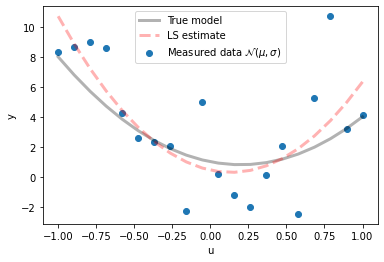

In [27]:
# Calculating the data tensor [1, u, u^2]
u_tensor_0 = np.reshape(u,(N,1))
ones_vec = np.ones((N,1))
u_tensor = np.append(ones_vec, u_tensor_0, axis=1)
for i in range(2,len(true_params)):
    u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)
    
# Calculate (u^T dot u)^-1 
u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

# Calculate (u^T dot y)
u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product

# Calculate LS parameters, theta_hat
LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]

# Recreate model based on LS estimate:
LS_estimate = arbitrary_poly(LS_params)

# Calculate Euclidian distance
diff = true_params - LS_params
distance_squared = 0
for d in diff:
    distance_squared += d*d
distance = np.sqrt(distance_squared)

# Plot true vs. estimated model
plt.scatter(u, y, label=r"Measured data $\mathcal{N}(\mu, \sigma)$")
plt.plot(u, y_model(u), "k", alpha=0.3, lw=3, label="True model")
plt.plot(u, LS_estimate(u), "r--", alpha = 0.3, lw=3, label="LS estimate")
plt.plot(distance)
plt.legend()
plt.xlabel("u")
plt.ylabel("y");
plt.savefig("alpha=0_beta=2.5.png")
print("Euclidean distance between model parameters:", distance)



### Task 1.4

#### alpha = 1, sigma varied:
sigma = 0.5 -> d = 0.44036559448002444\
![a=1_s=0.5](alpha=1_sigma=0.5.png)\
sigma = 1   -> d = 0.7723253614019504\
![a=1_s=1](alpha=1_sigma=1.png)\
sigma = 1.5 -> d = 0.7117299500446367\
![a=1_s=1.5](alpha=1_sigma=1.5.png)\
sigma = 2.5 -> d = 1.5351491646771245\
![a=1_s=2.5](alpha=1_sigma=2.5.png)

##### Comments: 
The euclidean distance d increases as sigma increases when alpha = 1. This makes sense as increasing sigma will introduce more noise to our "measurements", making estimation of the true model more difficult and increasing the disparity between the LS estimate and the true model.

#### alpha = 0, beta varied:
beta = 0.5  -> d = 0.4748130495699976\
![a=0_b=0.5](alpha=0_beta=0.5.png)\
beta = 1    -> d = 1.6227890688165616\
![a=0_b=1](alpha=0_beta=1.png)\
beta = 1.5  -> d = 1.3320819826917798\
![a=0_b=1.5](alpha=0_beta=1.5.png)\
beta = 2.5  -> d = 3.137692208955891\
![a=0_b=2.5](alpha=0_beta=2.5.png)

##### Comments:
The euclidean distance d increases as beta increases when alpha = 0 for the most part. It also looks like it has a higher d with the same variance, except when the variance is very low, compared to the cases with gaussian noise. 

#### sigma = beta = 1, alpha varied:
alpha = 0.2 -> d = 0.5229380380548991\
![s=b_a=0.2](alpha=0.2_sigma=beta.png)\
alpha = 0.4 -> d = 0.9089379810829245\
![s=b_a=0.4](alpha=0.4_sigma=beta.png)\
alpha = 0.5 -> d = 1.336397998642641\
![s=b_a=0.5](alpha=0.5_sigma=beta.png)\
alpha = 0.6 -> d = 1.11684956038744\
![s=b_a=0.6](alpha=0.6_sigma=beta.png)\
alpha = 0.8 -> d = 0.8173546819624863\
![s=b_a=0.8](alpha=0.8_sigma=beta.png)

##### Comments:
Varying alpha while sigma = beta = 1 produced very similar plots but the values for d were slightly higher when alpha came close to 0,5. This might indicate that it is easier to estimate the true model if there is mostly one kind of noise. Also worth noting is that we might have seen different results with different values for sigma and beta, as the experiment with alpha = 0 and varied beta indicated that the distance increased more for higher variance with laplacian noise. 